In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [416]:
#Read_Data
data = pd.read_csv("D:\\machine learning\\python_task\\house-prices-regression\\train.csv")

In [417]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [274]:
data.shape

(1460, 81)

In [275]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

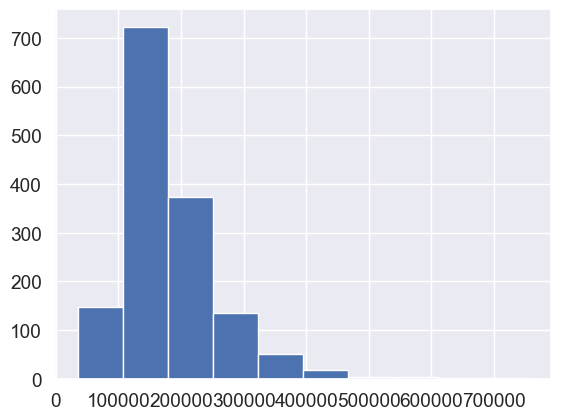

In [276]:
plt.hist(data["SalePrice"])

<Axes: >

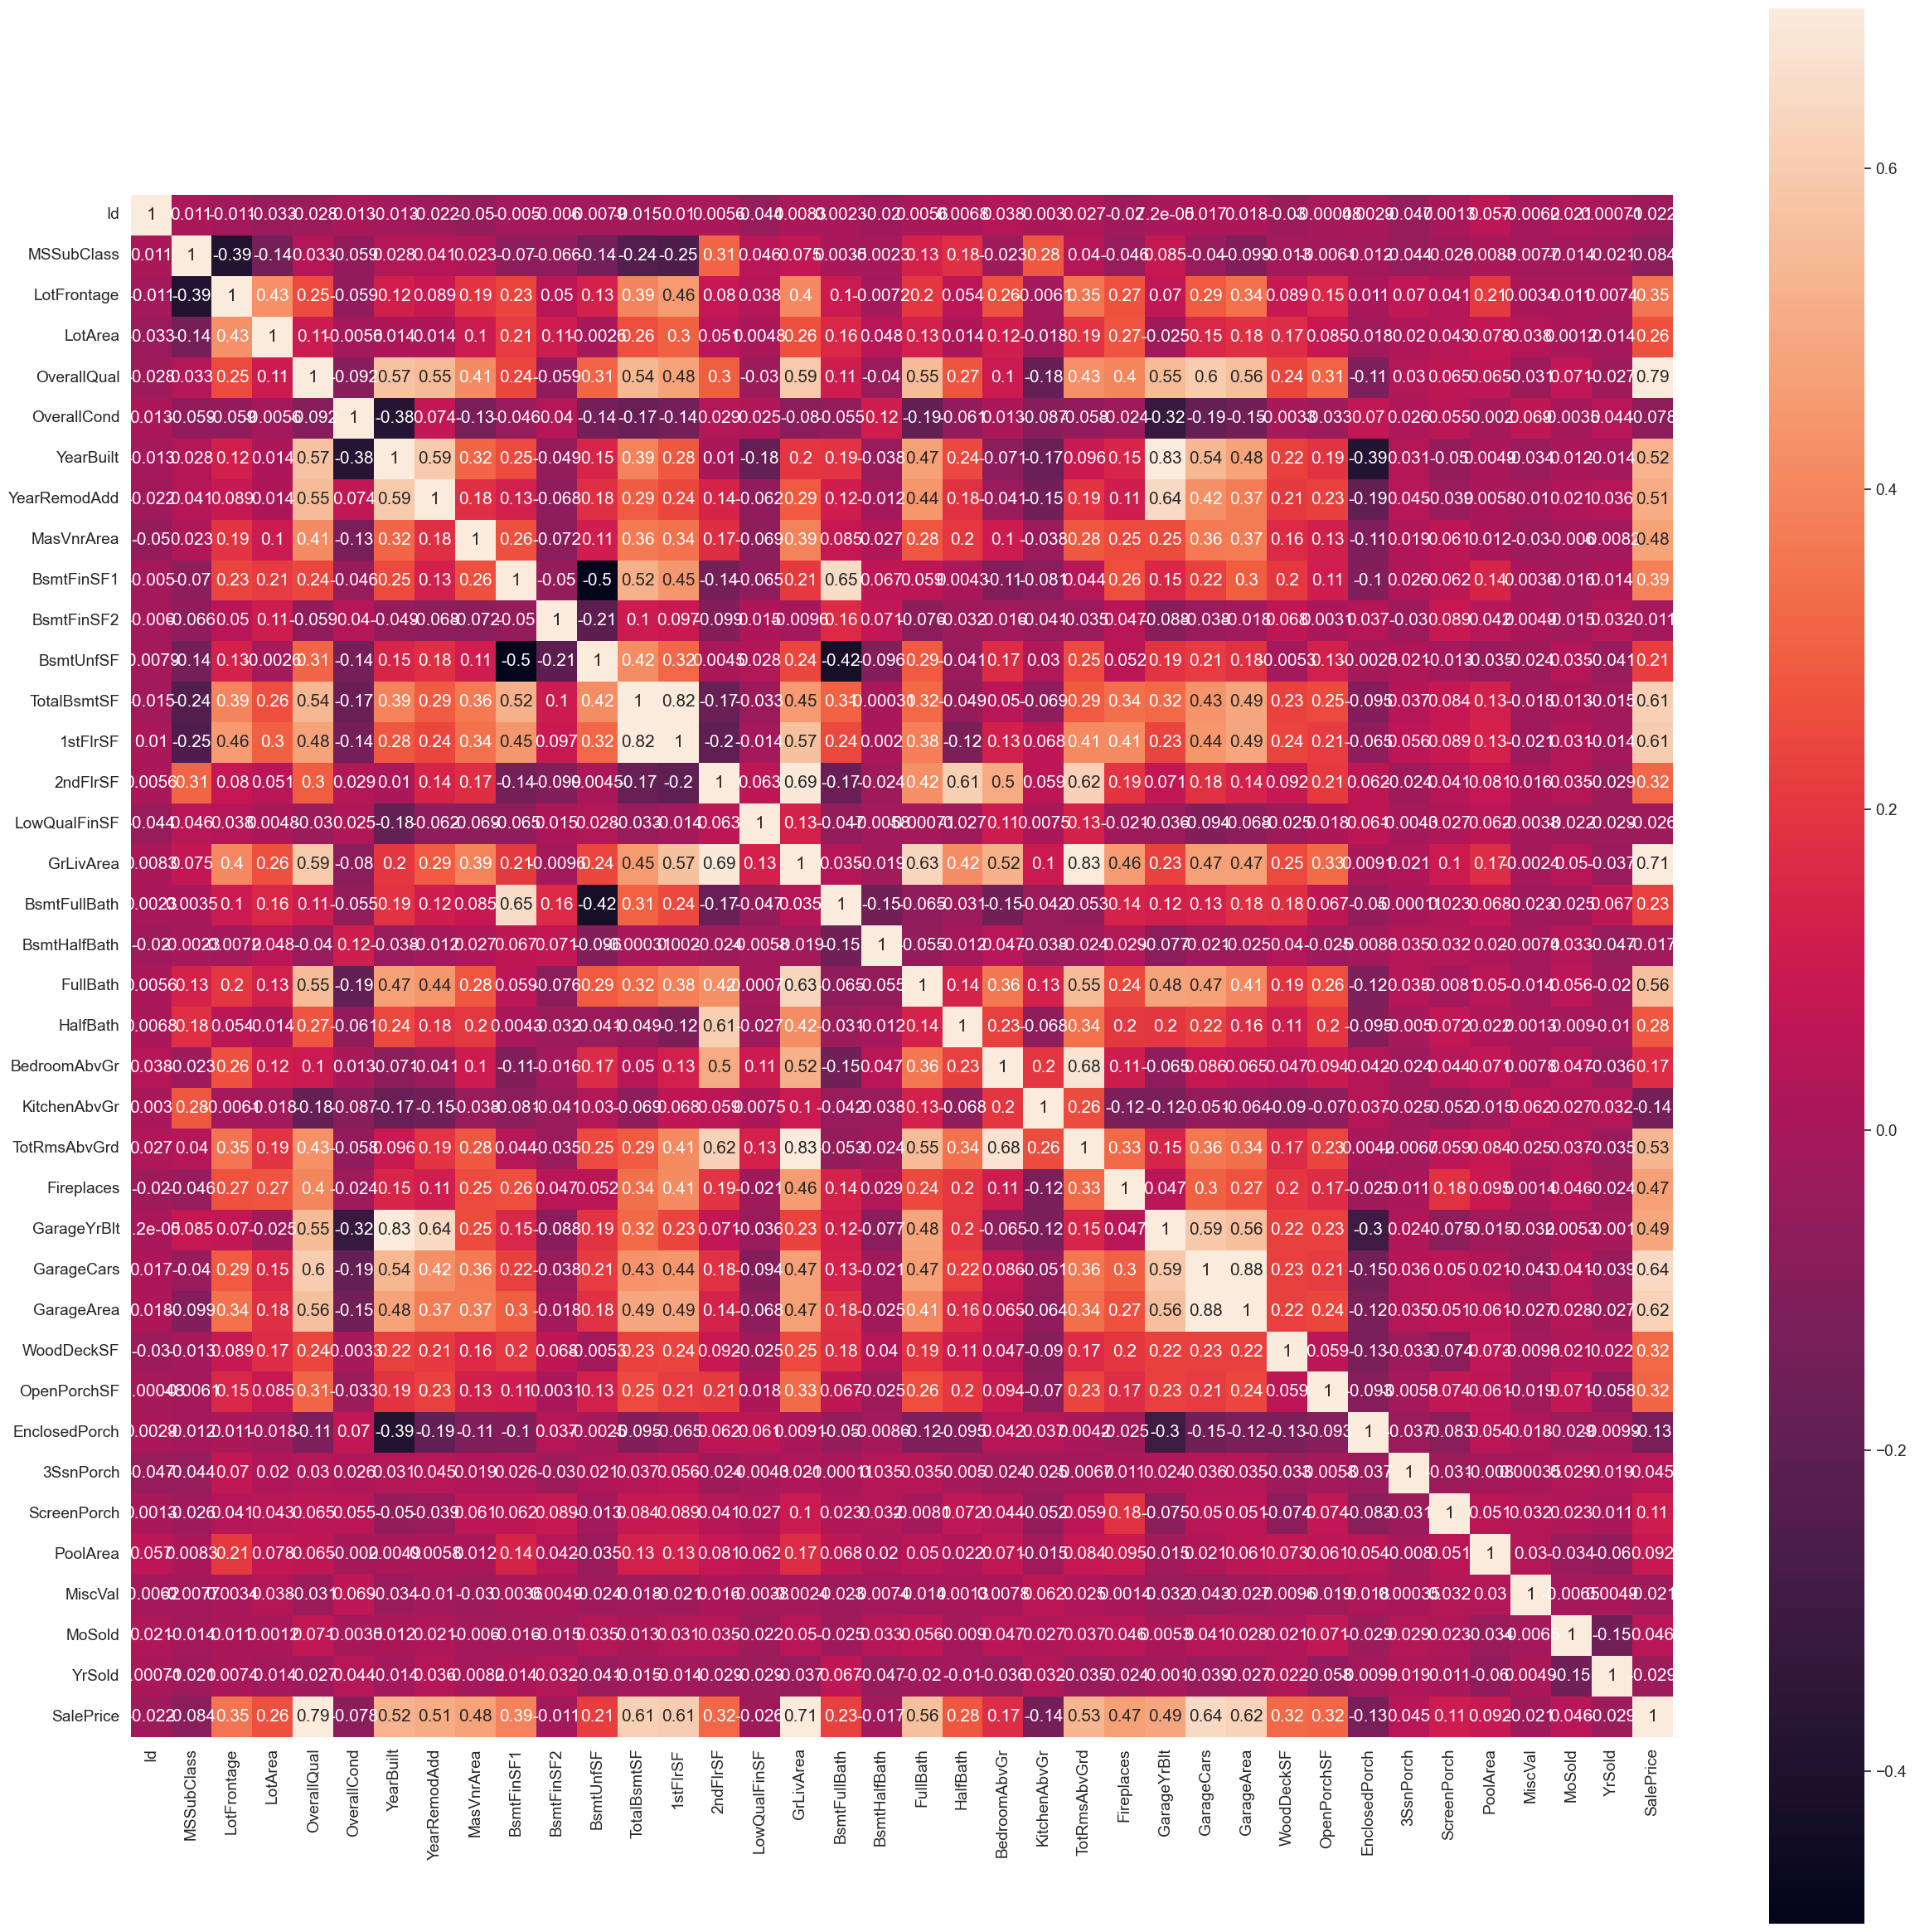

In [277]:
corr = data.corr()
plt.subplots(figsize= (30,30))
sns.heatmap(corr, vmax= .7, square= True, annot= True)

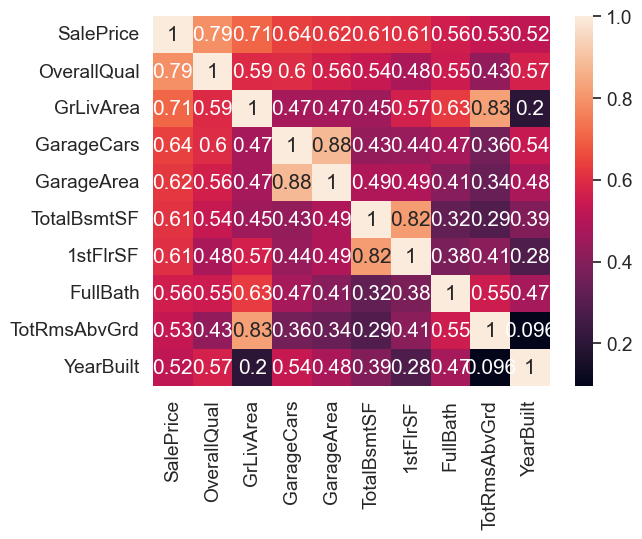

In [278]:
#zoomed heatmap with the 10 most affective values
cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

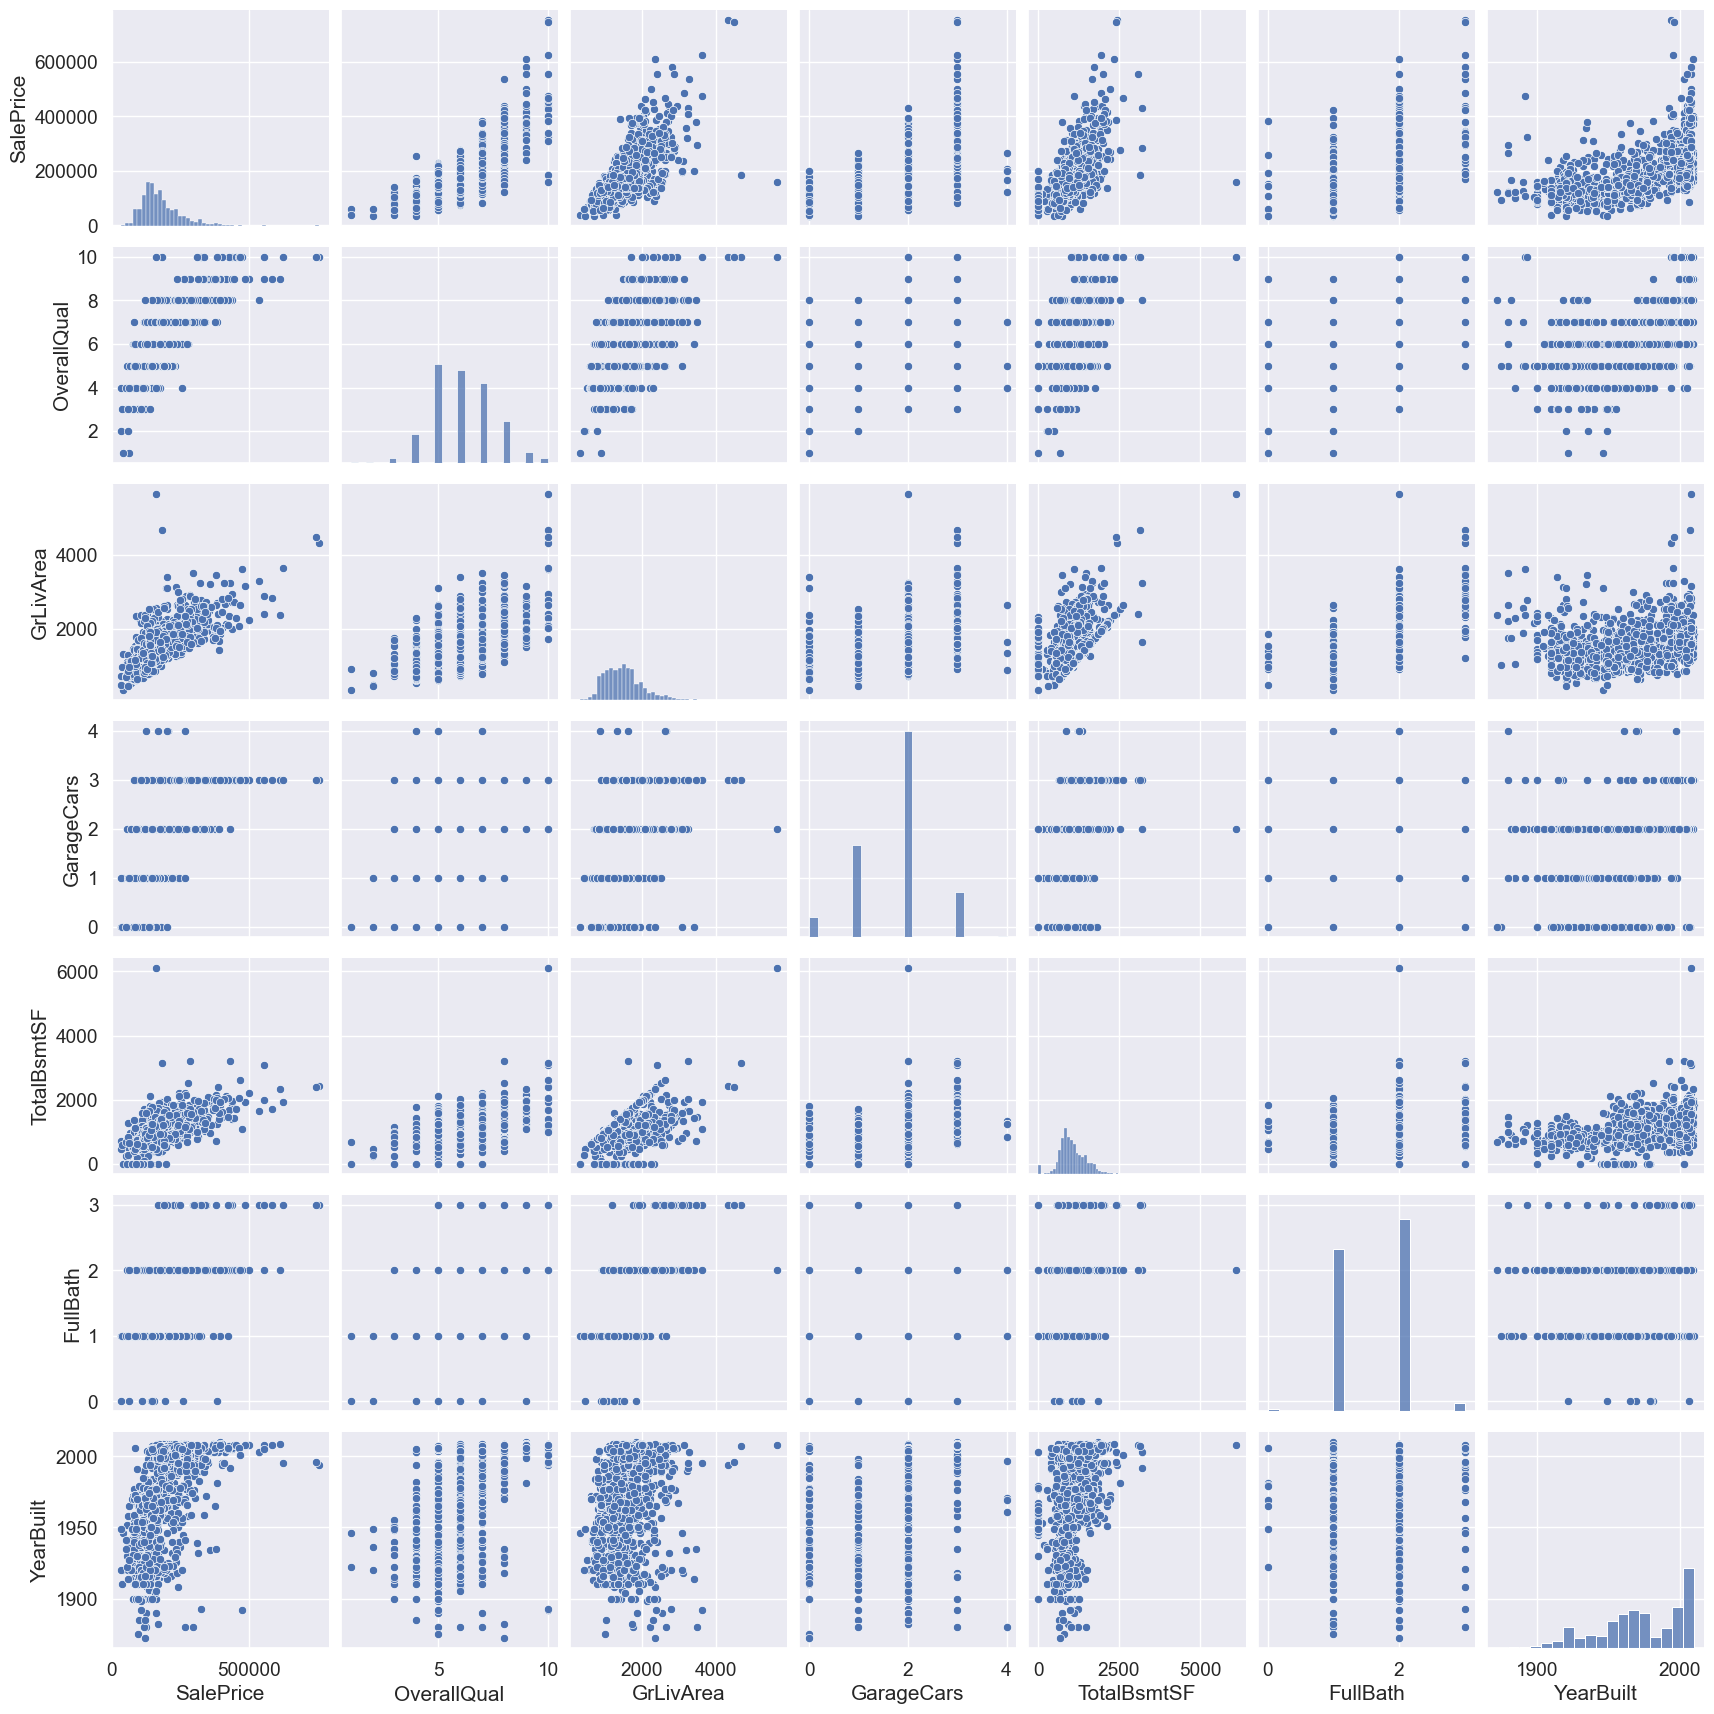

In [279]:
#showing the plots between 'SalePrice' and correlated variables 
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], height= 2.5)
plt.show()

In [280]:
#dealing with missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [281]:
data = data.drop(data.loc[data['Electrical'].isnull()].index)
data= missing_data.drop((missing_data[missing_data['Total'] > 1]), axis=1)
data.isnull().sum().max()

nan

In [287]:
#scaling the data
scaler= StandardScaler().fit_transform(data['SalePrice'][:,np.newaxis])
low_range = scaler[scaler[:,0].argsort()][:10]
high_range= scaler[scaler[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


In [ ]:
gliv = 'GrLivArea'
new_data= pd.concat([data['SalePrice'],data['GrLivArea']], axis= 1)
new_data.plot.scatter(x= 'GrLivArea', y= 'SalePrice')

In [ ]:
#there is two points should be deleted to avoid missleading
data = data.drop(data[data['Id'] == 1299].index)
data = data.drop(data[data['Id'] == 524].index)

In [ ]:
#same plot after deleting the points
gliv = 'GrLivArea'
new_data= pd.concat([data['SalePrice'],data['GrLivArea']], axis= 1)
new_data.plot.scatter(x= 'GrLivArea', y= 'SalePrice')

In [ ]:
TotalB= 'TotalBsmtSF'
new_data= pd.concat([data['SalePrice'],data['TotalBsmtSF']], axis= 1)
new_data.plot.scatter(x= 'TotalBsmtSF', y= 'SalePrice')

In [ ]:
from scipy import stats
from scipy.stats import norm
sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

In [ ]:
#regularization the data
data['SalePrice']= np.log(data['SalePrice'])

In [ ]:
#plot of saleprice after regularization
sns.distplot(data['SalePrice'], fit=norm);
plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

In [ ]:
#we will repeat the same steps in GrLivArea and TotalBsmtSF
data['GrLivArea']= np.log(data['GrLivArea'])

In [ ]:
sns.distplot(data['GrLivArea'], fit= norm)
plt.figure()

In [ ]:
sts= stats.probplot(data['GrLivArea'], plot= plt)

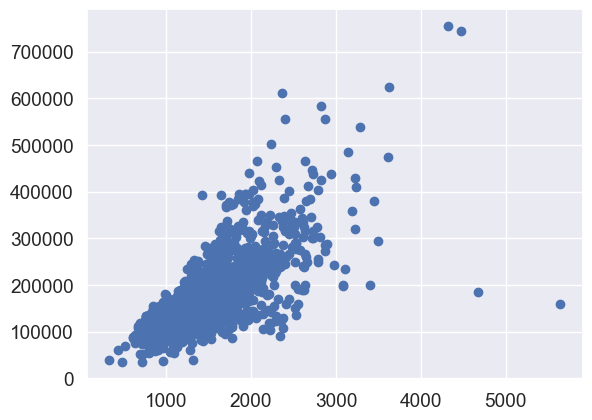

In [288]:
#test homoscedasticity
plt.scatter(data['GrLivArea'], data['SalePrice'])

In [261]:
#convert categorical variable into num
data = pd.get_dummies(data)

In [292]:
#split the data into process in X and result in y
predictor_cols = ['LotArea', 'OverallQual', 'YearBuilt', 'TotRmsAbvGrd']
X_train= data[predictor_cols]
y_train= data.SalePrice

In [293]:
print(X_train.head(10))

   LotArea  OverallQual  YearBuilt  TotRmsAbvGrd
0     8450            7       2003             8
1     9600            6       1976             6
2    11250            7       2001             6
3     9550            7       1915             7
4    14260            8       2000             9
5    14115            5       1993             5
6    10084            8       2004             7
7    10382            7       1973             7
8     6120            7       1931             8
9     7420            5       1939             5


In [294]:
print(y_train.head(10))

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64


In [266]:
#X_train= SimpleImputer(missing_values= 'nan', strategy= 'mean')

In [366]:
random_forest = RandomForestRegressor(n_estimators= 30)
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [418]:
test_data= pd.read_csv("D:\\machine learning\\python_task\\house-prices-regression\\test.csv")

In [419]:
test_data.shape

(1459, 80)

In [420]:
X_test= test_data[predictor_cols]

In [421]:
y_test= random_forest.predict(X_test)

In [422]:
print(y_test)

[135483.33333333 209750.         158764.66666667 ... 153263.33333333
 144340.         261169.66666667]


In [372]:
random_forest.score(X_train, y_train)

0.9630622886324812

In [405]:
random_forest.score(X_test, y_test)

0.7955315616141012